# **Model Development**


### Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 


In [ ]:
filepath="LaptopPricing-Dataset-EDA.csv"
df = pd.read_csv(filepath)

In [3]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 : Single Linear Regression
 Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [4]:

lm=LinearRegression()

X=df[['CPU_frequency']]
Y=df['Price']

lm.fit(X,Y)
Yhat=lm.predict(X)




Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


c:\Users\pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


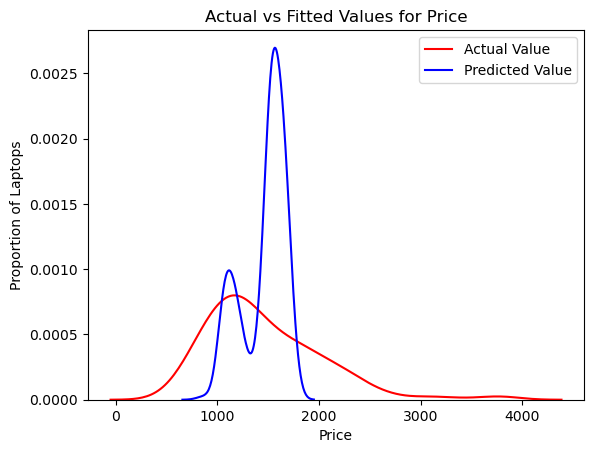

In [5]:

width=10
height=10
#plt.figure(figsize=(width,length))
ax1=sns.distplot(df['Price'],hist=False,color='r',label='Actual Value')
sns.distplot(Yhat,hist=False,color='b',label='Fitted Values',ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value','Predicted Value'])
plt.show()


Evaluate the Mean Squared Error and R^2 score values for the model. 


In [6]:

mse_slr=mean_squared_error(X,Yhat)
print("The MSE of Price and Predicted value is : ",mse_slr)

r2_slr=lm.score(X,Y)
print('The R-square for SLR is : ',r2_slr)



The MSE of Price and Predicted value is :  2180215.80884109
The R-square for SLR is :  0.1344436321024326


# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system. 


In [7]:
lm1=LinearRegression()
Z=df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)

Yhat1=lm1.predict(Z)


Plot the Distribution graph of the predicted values as well as the Actual values


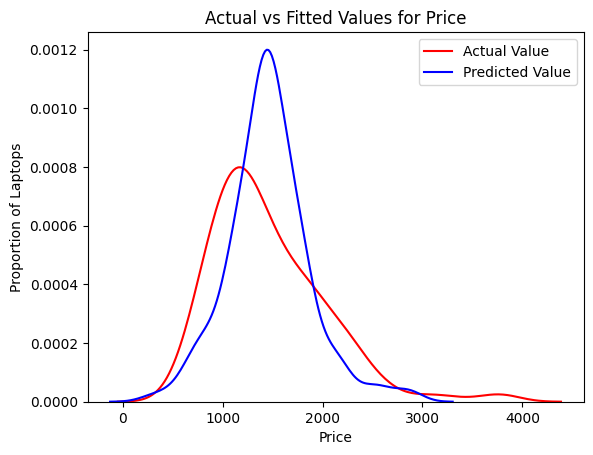

In [22]:
# Write your code below and press Shift+Enter to execute
ax1=sns.distplot(df['Price'],hist=False,color='r',label='Actual Value')
sns.distplot(Yhat1,hist=False,color='b',label='Fitted Value',ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value','Predicted Value'])
plt.show()

Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [25]:

mse_mlr=mean_squared_error(df['Price'],Yhat1)
print("The MSE of Price and Predicted value is : ",mse_mlr)

r2_mlr=lm1.score(Z,Y)
print('The R-square for MLR is : ',r2_mlr)


The MSE of Price and Predicted value is :  161680.57263893104
The R-square for MLR is :  0.5082509055187376
0.5082509055187376


# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. 


In [31]:

x=df['CPU_frequency']
f1=np.polyfit(x,Y,1)
p1=np.poly1d(f1)
print(p1)

f3=np.polyfit(x,Y,3)
p3=np.poly1d(f3)
print(p3)

f5=np.polyfit(x,Y,5)
p5=np.poly1d(f5)
print(p5)

 
1485 x + 253.7
           3             2
3.409e+04 x - 6.574e+04 x + 4.129e+04 x - 7238
           5            4             3             2
1.357e+06 x - 4.72e+06 x + 6.458e+06 x - 4.336e+06 x + 1.425e+06 x - 1.818e+05


Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.


In [33]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.


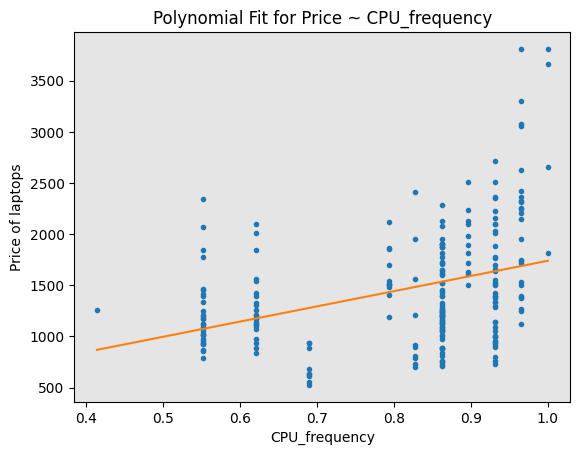

In [34]:

# Call for function of degree 1
PlotPolly(p1,x,Y,'CPU_frequency')

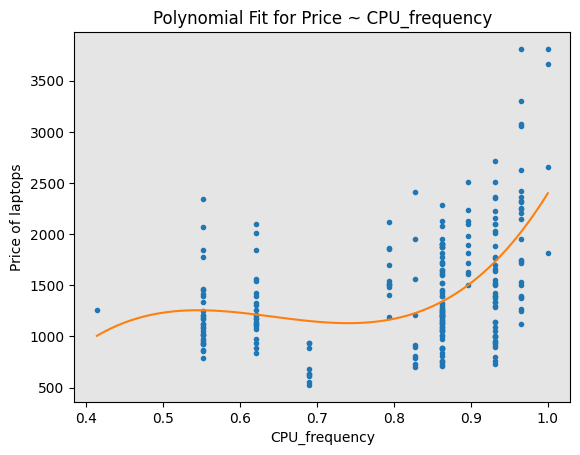

In [35]:

# Call for function of degree 3
PlotPolly(p3,x,Y,'CPU_frequency')

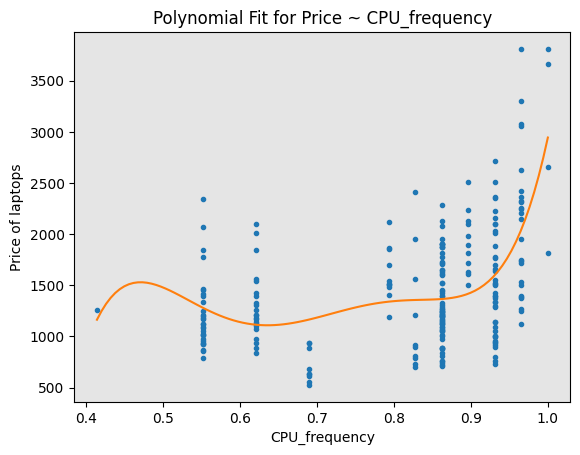

In [36]:

# Call for function of degree 5
PlotPolly(p5,x,Y,'CPU_frequency')

Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [39]:

r2_poly1=r2_score(Y,p1(x))
mse_poly1=mean_squared_error(Y,p1(x))
print("The MSE for 1 degree Polynomial is   : ",mse_poly1)
print("The r-square for 1 degree Polynomial : ",r2_poly1)

r2_poly3=r2_score(Y,p3(x))
mse_poly3=mean_squared_error(Y,p3(x))
print("\nThe MSE for 3 degree Polynomial is   : ",mse_poly3)
print("The r-square for 3 degree Polynomial : ",r2_poly3)

r2_poly5=r2_score(Y,p5(x))
mse_poly5=mean_squared_error(Y,p5(x))
print("\nThe MSE for 5 degree Polynomial is   : ",mse_poly5)
print("The r-square for 5 degree Polynomial : ",r2_poly5)

The MSE for 1 degree Polynomial is   :  284583.4405868629
The r-square for 1 degree Polynomial :  0.1344436321024326

The MSE for 3 degree Polynomial is   :  241024.86303848765
The r-square for 3 degree Polynomial :  0.2669264079653113

The MSE for 5 degree Polynomial is   :  229137.29548053455
The r-square for 5 degree Polynomial :  0.3030822706443915


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 


In [46]:

Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
Z=Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

Evaluate the MSE and R^2 values for the this predicted output.


In [47]:
#  Write your code below and press Shift+Enter to execute
mse_pipe=mean_squared_error(Y,ypipe)
r2_pipe=r2_score(Y,ypipe)
print("The MSE for multi-variable polynomial pipeline is : ",mse_pipe)
print("The R2 for multi-variable polynomial pipeline is : ",r2_pipe)

The MSE for multi-variable polynomial pipeline is :  120595.80746232362
The R2 for multi-variable polynomial pipeline is :  0.6332096172725036


You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.
